# Tutorial Practice 1

# Imports


In [308]:
import numpy as np
import matplotlib.pyplot as plt

#Functions

In [355]:
def correlation_coeff(x, y, n):
  x_ = np.mean(x)
  y_ = np.mean(y)
  x_x_ = x - x_
  y_y_ = y - y_
  xy = x_x_ * y_y_
  num = sum(xy)
  dem = sum(pow(x_x_, 2)) * sum(pow(y_y_, 2))
  return num / pow(dem, 0.5)

def lin_al(x, y, n):
  x_2 = x * x
  xy = x * y
  intercept = ((sum(y) * sum(x_2)) - (sum(x) * sum(xy))) / ((n * sum(x_2)) - (pow(sum(x), 2)))
  slope = ((n * sum(xy)) - (sum(x) * sum(y))) / ((n * sum(x_2)) - pow(sum(x), 2))
  return intercept, slope

def least_squares(x, y, i, s):
  diff = y - (i + s * x)
  err = np.mean(pow(diff, 2))
  return pow(err, 0.5)

def pred(x, i, s):
  return i + s * x

def plot(x, y, i, s, pred=np.array([])):
  x = np.sort(x)
  fig, ax = plt.subplots(1, 1)
  ax.scatter(x, y, label = "Data")
  ax.plot(x, i + s * x, label = "Prediction", color = 'r')
  ax.scatter(pred, i + s * pred, label = "Value", color = 'g')
  fig.legend()
  plt.show(fig)

#1

In [409]:
x = np.array([2, 3, 5, 7, 9])
y = np.array([4, 5, 7, 10, 15])

In [410]:
i, s = lin_al(x, y, 5)
print("Intercept:", i, "Slope:", s)

Intercept: 0.3048780487804878 Slope: 1.5182926829268293


In [411]:
correlation_coeff(x, y, 5)

0.9795560970827194

In [412]:
least_squares(x, y, i, s)

0.7986268703523449

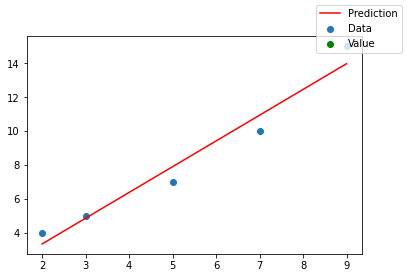

In [413]:
plot(x, y, i, s)

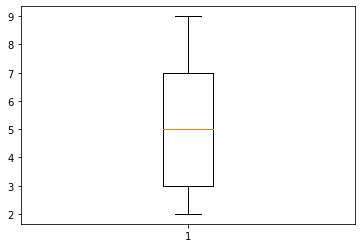

In [414]:
plt.boxplot(x)
plt.show()

#2

In [415]:
x = np.array([14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2])
y = np.array([215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408])

In [416]:
correlation_coeff(x, y, 12)

0.9575066230015952

In [417]:
i, s = lin_al(x, y, 12)
print(i, s)

-159.47415234086318 30.08786179424521


In [418]:
least_squares(x, y, i, s)

34.804573952003956

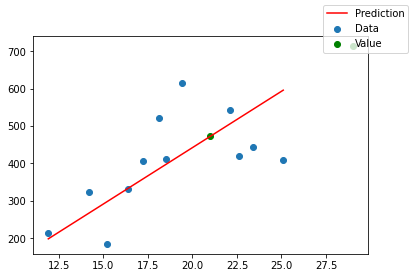

In [419]:
plot(x, y, i, s, np.array([21, 29]))

In [420]:
pred(21, i, s)

472.3709453382862

In [421]:
pred(29, i, s)

713.0738396922479